# Name: Fenil Patel
# Student ID: 100867001

In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2023-03-26 20:58:14--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-03-26 20:58:15--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucde0780d81fb08551de616b4a71.dl.dropboxusercontent.com/cd/0/inline/B48RFQhy8QUOHyirhjYNr1E3HP4Q8cO9Ovm6kvQbjBhRgFCA_h4nBNuSsGCLFh82cPS5hDXPUu3SGW7CmAoK26uLKa56bMzuyaPrhaUU7i0cW-2LNJdbZMkbeqc70u27A6FDwO2kxH483maEnD2hTy80FDt6Aj44_49jMnjD_9xnDg/file# [following]
--2023-03-26 20:58:15--  https://ucde0780d81fb08551de616b4a71.dl.dropboxusercontent.com/cd/0/inline/B48RFQhy8QUOHyirhjYNr1E3HP4Q8cO9Ovm6kvQbjBhRgFCA_h4nBNuSsGCLFh82cPS5hDXPUu3S

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

#Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#Building model to train the data

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating the model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

#Preparing data using Image Data Generator

In [ ]:
train_data_gen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_data_gen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32)


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_data_gen = ImageDataGenerator(rescale = 1./255 )

val_data = val_data_gen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32)

Found 7178 images belonging to 7 classes.


#Visualizing data which is fed to training data

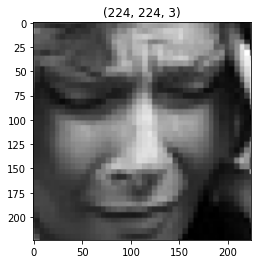

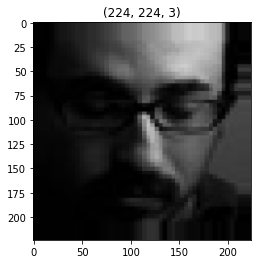

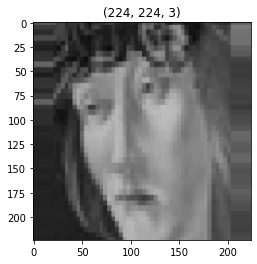

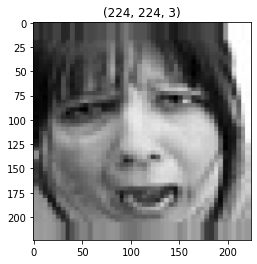

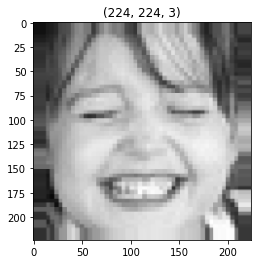

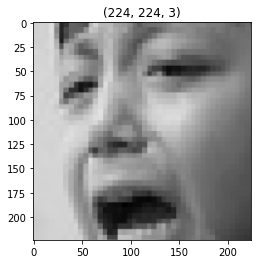

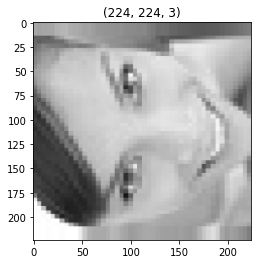

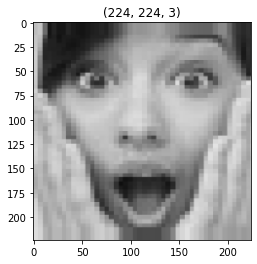

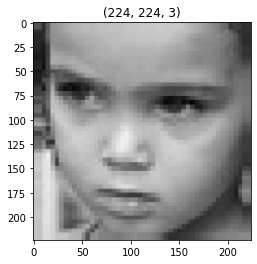

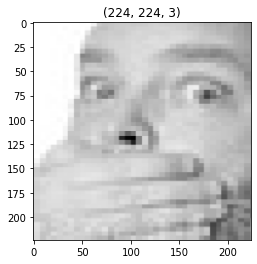

In [ ]:
# visualize the images in the training data denerator 

train_img , label = train_data.next()

# function when called will plot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

# function call to plot the images 
plotImages(train_img, label)

#Having early stopping and model check point 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
er_stop = EarlyStopping(monitor ='val_accuracy', min_delta = 0.01 , patience = 5, verbose = 1, mode = 'auto')

# model check point
mod_check = ModelCheckpoint(filepath = "best_model.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')

# puting call back in a list 
call_back = [er_stop, mod_check]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[er_stop,mod_check])

<ipython-input-53-0c32d720bd62>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 4.9724 - accuracy: 0.4031
Epoch 1: val_accuracy improved from -inf to 0.43359, saving model to best_model.h5
10/10 [==============================] - 40s 4s/step - loss: 4.9724 - accuracy: 0.4031 - val_loss: 4.5276 - val_accuracy: 0.4336
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 5.1912 - accuracy: 0.4531
Epoch 2: val_accuracy improved from 0.43359 to 0.44141, saving model to best_model.h5
10/10 [==============================] - 30s 3s/step - loss: 5.1912 - accuracy: 0.4531 - val_loss: 4.5508 - val_accuracy: 0.4414
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 5.0552 - accuracy: 0.4437
Epoch 3: val_accuracy did not improve from 0.44141
10/10 [==============================] - 37s 4s/step - loss: 5.0552 - accuracy: 0.4437 - val_loss: 5.2265 - val_accuracy: 0.4258
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.0520 - accuracy: 0.4125
Epoch 4: val_accu

In [ ]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
hstry =  hist.history
hstry.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#Line graph of accuracy and loss

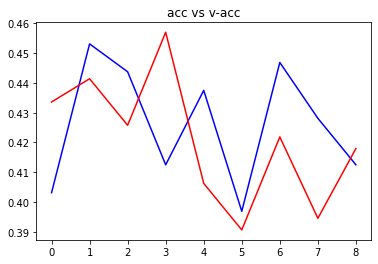

In [ ]:
plt.plot(hstry['accuracy'], c = "blue")
plt.plot(hstry['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

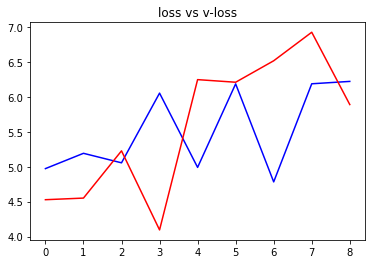

In [ ]:
plt.plot(hstry['loss'], c = "blue")
plt.plot(hstry['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 166ms/step
 The image is of happy


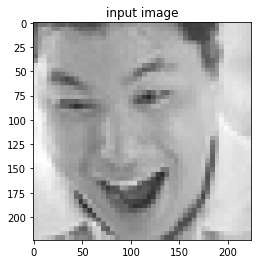

In [ ]:
# giving path of image to predict it class
path = "/content/test/happy/PrivateTest_10736786.jpg"
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" The image is of {op[pred]}")

# display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()